In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
yelp = pd.read_csv('yelp_data.csv')
yelp.describe()

,permitID,zip,lat,lon,rating,review_count
count,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000
mean,56592.225557,20102.490566,38.910271,-77.032724,3.442967,178.775729
std,77197.938436,3745.880658,0.023379,0.034176,0.665995,315.331695
min,520.000000,20001.000000,38.730234,-77.520656,1.000000,1.000000
25%,2872.000000,20003.000000,38.899915,-77.044704,3.000000,25.000000
50%,5488.000000,20008.000000,38.905926,-77.032357,3.500000,86.000000
75%,147749.500000,20015.250000,38.919573,-77.020685,4.000000,227.000000
max,188822.000000,200815.000000,39.286960,-76.565590,5.000000,8011.000000


In [3]:
yelp_edit = yelp[['permitID', 'rating']]
yelp_edit.to_csv('yelp_edit.csv', index=False)
mapping = pd.read_csv('mapping.csv')
mapping.describe()

,inspec_id,permit_id,crit_viol,non_crit_viol,crit_viol_cos,crit_viol_rpt,non_crit_viol_cos,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr,lat,lon
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.00000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000
mean,517700.486090,41921.192210,4.089530,1.992413,1.617097,0.03743,0.292868,0.026302,2.472433,1.699545,38.908070,-77.040674
std,275549.954583,67181.929734,2.932365,1.800653,1.637606,0.23938,0.582048,0.183632,2.384238,1.680673,0.033894,0.287468
min,105164.000000,532.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,38.831741,-84.384267
25%,202634.000000,2600.000000,2.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,38.897508,-77.044423
50%,607187.000000,4520.000000,3.000000,2.000000,1.000000,0.00000,0.000000,0.000000,2.000000,1.000000,38.902878,-77.028725
75%,813221.000000,7219.000000,6.000000,3.000000,2.000000,0.00000,0.000000,0.000000,4.000000,3.000000,38.916840,-77.015436
max,825329.000000,188740.000000,22.000000,12.000000,11.000000,3.00000,4.000000,2.000000,21.000000,12.000000,39.621380,-76.937156


In [4]:
mapping_edit = mapping[['permit_id', 'crit_viol', 'non_crit_viol', 'crit_viol_cos', 'crit_viol_rpt', 'non_crit_viol_cos', 'non_crit_viol_rpt', 'crit_viol_tbr',
       'non_crit_viol_tbr']]
mapping_edit.to_csv('mapping_edit.csv', index=False)

# working on file yelp_edit and mapping_edit

In [6]:
yelp_edit.head()

,permitID,rating
0,172655.0,3.5
1,6476.0,3.5
2,7190.0,4.0
3,6764.0,4.0
4,6994.0,4.5


In [7]:
mapping_edit.head()

,permit_id,crit_viol,non_crit_viol,crit_viol_cos,crit_viol_rpt,non_crit_viol_cos,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr
0,5853,5.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0
1,3794,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3794,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0


In [8]:
yelp_df = pd.read_csv('yelp_edit.csv')
mapping_df = pd.read_csv('mapping_edit.csv')

# Merge the datasets on the common column
merged_df_yelp_mapping = pd.merge(yelp_df, mapping_df, left_on='permitID', right_on='permit_id', how='inner')

# Display the merged dataframe
merged_df_yelp_mapping.head()


,permitID,rating,permit_id,crit_viol,non_crit_viol,crit_viol_cos,crit_viol_rpt,non_crit_viol_cos,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr
0,172655.0,3.5,172655,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1,172655.0,3.5,172655,12.0,4.0,2.0,0.0,0.0,0.0,10.0,4.0
2,172655.0,3.5,172655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,172655.0,3.5,172655,2.0,4.0,0.0,0.0,0.0,0.0,2.0,4.0
4,6476.0,3.5,6476,11.0,7.0,2.0,0.0,0.0,0.0,9.0,7.0


In [15]:
merged_df_yelp_mapping.to_csv('merged_df_yelp_mapping.csv', index=False)
merged_df_yelp_mapping = pd.read_csv('merged_df_yelp_mapping.csv')
merged_df_yelp_mapping.head()

,permitID,rating,permit_id,crit_viol,non_crit_viol,crit_viol_cos,crit_viol_rpt,non_crit_viol_cos,non_crit_viol_rpt,crit_viol_tbr,non_crit_viol_tbr
0,172655.0,3.5,172655,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1,172655.0,3.5,172655,12.0,4.0,2.0,0.0,0.0,0.0,10.0,4.0
2,172655.0,3.5,172655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,172655.0,3.5,172655,2.0,4.0,0.0,0.0,0.0,0.0,2.0,4.0
4,6476.0,3.5,6476,11.0,7.0,2.0,0.0,0.0,0.0,9.0,7.0


In [16]:
# Aggregations by permitID
agg_df = merged_df_yelp_mapping.groupby('permit_id').agg({
    'rating': 'mean',  
    'crit_viol': 'mean',
    'crit_viol_cos': 'sum',  
    'crit_viol_rpt': 'sum',  
    'crit_viol_tbr': 'sum',  
}).reset_index()
agg_df


,permit_id,rating,crit_viol,crit_viol_cos,crit_viol_rpt,crit_viol_tbr
0,602,4.0,5.000000,5.0,0.0,5.0
1,611,3.5,3.333333,3.0,2.0,7.0
2,623,3.5,3.000000,5.0,0.0,1.0
3,716,3.5,1.000000,2.0,0.0,0.0
4,725,3.0,5.666667,6.0,0.0,11.0
...,...,...,...,...,...,...
647,188255,3.5,1.500000,2.0,0.0,1.0
648,188283,3.5,2.500000,3.0,0.0,2.0
649,188459,2.0,0.000000,0.0,0.0,0.0
650,188461,3.5,6.000000,2.0,0.0,4.0


In [17]:
index_permitid = agg_df[['permit_id']]
index_permitid

,permit_id
0,602
1,611
2,623
3,716
4,725
...,...
647,188255
648,188283
649,188459
650,188461


In [18]:
agg_df.drop(['permit_id'], axis=1, inplace=True)
X = agg_df
X

,rating,crit_viol,crit_viol_cos,crit_viol_rpt,crit_viol_tbr
0,4.0,5.000000,5.0,0.0,5.0
1,3.5,3.333333,3.0,2.0,7.0
2,3.5,3.000000,5.0,0.0,1.0
3,3.5,1.000000,2.0,0.0,0.0
4,3.0,5.666667,6.0,0.0,11.0
...,...,...,...,...,...
647,3.5,1.500000,2.0,0.0,1.0
648,3.5,2.500000,3.0,0.0,2.0
649,2.0,0.000000,0.0,0.0,0.0
650,3.5,6.000000,2.0,0.0,4.0


# applying K menas clustering:

## Finding the optimal number of clusters using elbow method

/home/jaiswalsuraj/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jaiswalsuraj/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jaiswalsuraj/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jaiswalsuraj/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

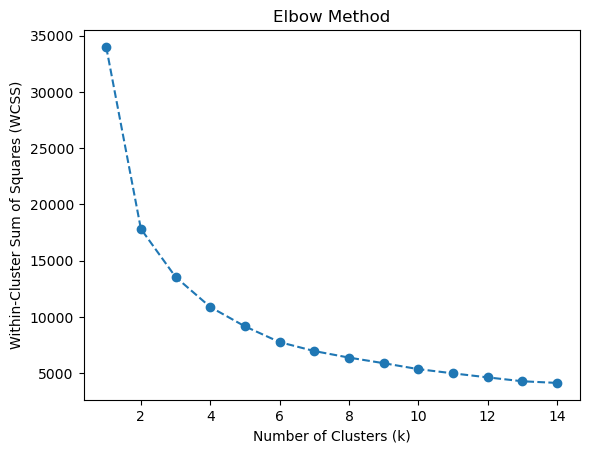

In [19]:
wcss = []

# Try different values of k (e.g., from 1 to 10)
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(agg_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

We select k = 4

In [20]:
n_clusters = 4 # You can adjust this based on your domain knowledge or evaluation
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

/home/jaiswalsuraj/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Add cluster labels to your data
X['cluster'] = kmeans.labels_
X

,rating,crit_viol,crit_viol_cos,crit_viol_rpt,crit_viol_tbr,cluster
0,4.0,5.000000,5.0,0.0,5.0,3
1,3.5,3.333333,3.0,2.0,7.0,3
2,3.5,3.000000,5.0,0.0,1.0,1
3,3.5,1.000000,2.0,0.0,0.0,1
4,3.0,5.666667,6.0,0.0,11.0,3
...,...,...,...,...,...,...
647,3.5,1.500000,2.0,0.0,1.0,1
648,3.5,2.500000,3.0,0.0,2.0,1
649,2.0,0.000000,0.0,0.0,0.0,1
650,3.5,6.000000,2.0,0.0,4.0,1


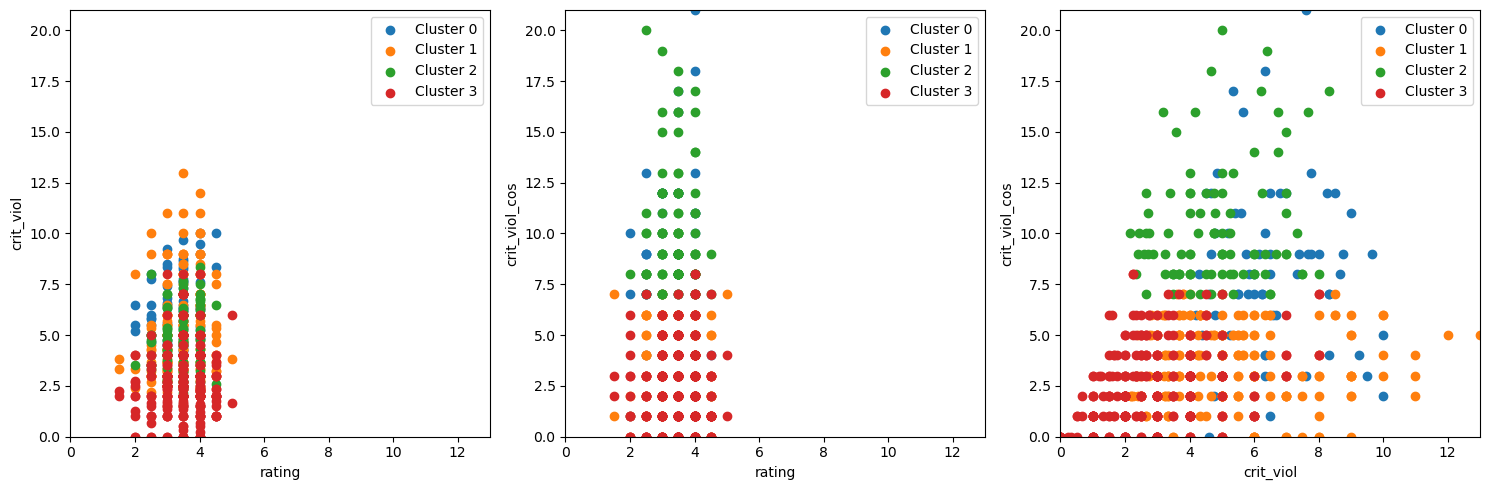

In [100]:
feature_pairs = [('rating', 'crit_viol'), ('rating', 'crit_viol_cos'), ('crit_viol', 'crit_viol_cos')]

plt.figure(figsize=(15, 5))
for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(1, 3, i)
    for cluster in range(n_clusters):
        cluster_data = X[X['cluster'] == cluster]
        plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.xlim(0,13)
    plt.ylim(0,21)
    plt.legend()

plt.tight_layout()
plt.show()

We see ('crit_viol', 'crit_viol_cos') features to decide which cluster are more revelent

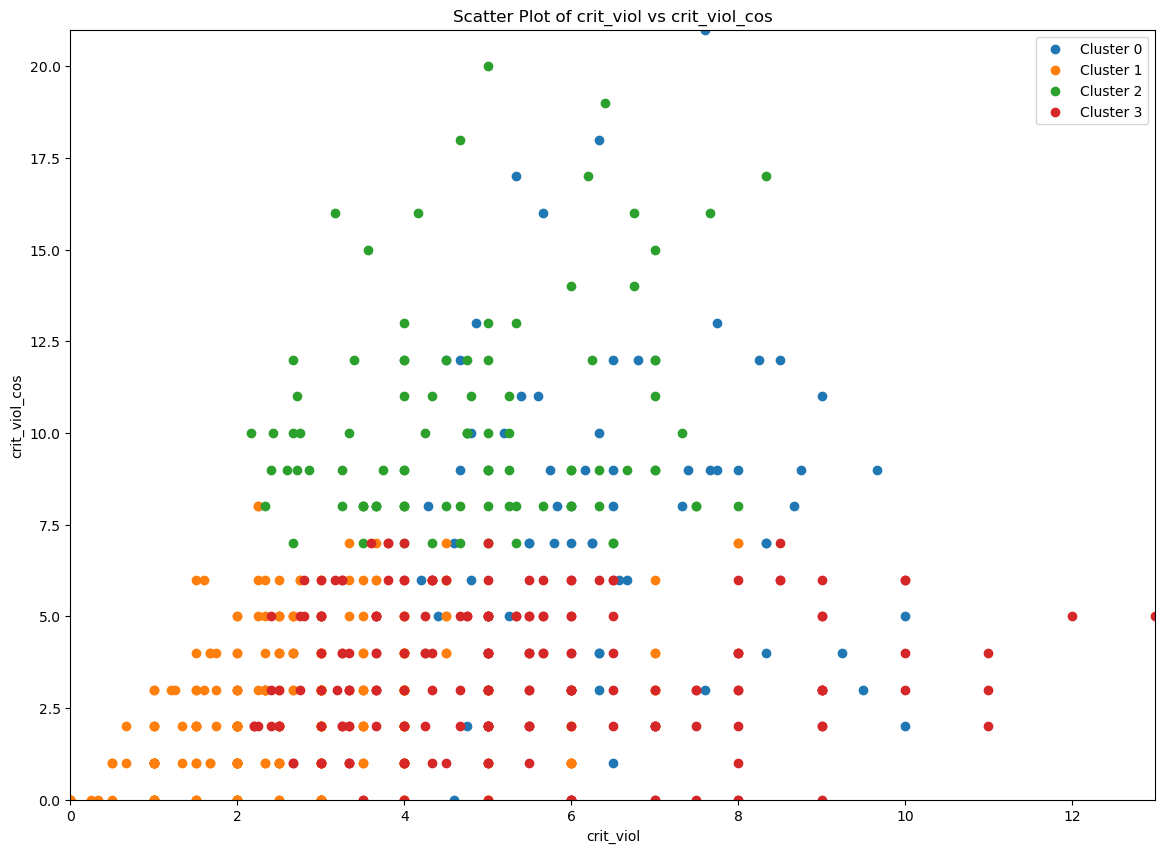

In [22]:
feature_pairs = [('crit_viol', 'crit_viol_cos')]

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(14, 10))  # Adjust the figsize as needed
    for cluster in range(n_clusters):
        cluster_data = X[X['cluster'] == cluster]
        plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.xlim(0, 13)
    plt.ylim(0, 21)
    plt.legend()
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.show()

we can see cluster 2 and cluster 3 have high crit_voil and high crit_voil_cos

In [107]:
# Assuming you've added cluster labels to your data as 'cluster'
cluster_2_indices = X[X['cluster'] == 2].index
cluster_3_indices = X[X['cluster'] == 3].index

# print("Indices of data points in Cluster 2:", cluster_2_indices)
# print("Indices of data points in Cluster 3:", cluster_3_indices)


Indices of data points in Cluster 2: Int64Index([  5,  17,  23,  29,  49,  58,  63,  72,  73,  80,  84,  86,  90,
             96,  98, 101, 103, 116, 126, 165, 169, 173, 175, 177, 178, 179,
            180, 182, 198, 200, 205, 209, 215, 216, 219, 222, 224, 245, 256,
            259, 263, 266, 267, 285, 288, 304, 311, 326, 328, 329, 332, 337,
            338, 340, 344, 346, 351, 352, 359, 360, 363, 375, 376, 381, 409,
            411, 420, 428, 439, 442, 461, 466, 467, 469, 478, 480, 487, 497,
            501, 509, 530, 531, 534, 541, 548, 551, 554, 578, 580, 585, 599,
            610, 634],
           dtype='int64')
Indices of data points in Cluster 3: Int64Index([  2,   3,   9,  11,  12,  15,  16,  21,  24,  25,
            ...
            642, 643, 644, 645, 646, 647, 648, 649, 650, 651],
           dtype='int64', length=301)


Using index of cluster 2 and 3 we can find the permit_id of the restaurant

In [136]:
cluster_2 = index_permitid.iloc[cluster_2_indices]
cluster_2


,permit_id
5,757
17,1044
23,1220
29,1284
49,1477
...,...
580,172745
585,172804
599,172926
610,173130


In [137]:
cluster_3 = index_permitid.iloc[cluster_3_indices]
cluster_3


,permit_id
2,623
3,716
9,855
11,867
12,871
...,...
647,188255
648,188283
649,188459
650,188461
